# Decoding Blockcourse - Part 1

Getting your feet wet with python and spike train data.

#### first, execute this cell:

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline 

### Exercise 1 a)

You are given some spike data as a list of spike times in milliseconds. But that is a cumbersome format - we much prefer our spike trains in the form of binary time series of fixed length.

Create an array called `spikes` whose number of entries is `trial_length` and which is 1 at every time step where a spike was recorded, 0 everywhere else.


In [2]:
trial_length = 1000
spike_times = [50, 133, 141, 217, 227, 297, 370, 409, 418, 421, 423, 428, 470, 487, 541, 555, 556, 562, 637, 639, 732, 745, 758, 816, 825, 828, 829, 842, 862, 873, 874, 932]
# spikes = ...
spikes = np.zeros(trial_length)  # solution
for spike_time in spike_times:   # solution
    spikes[spike_time] = 1       # solution

# shorter alternative:           # solution
spikes = np.zeros(trial_length)  # solution
spikes[spike_times] = 1          # solution

**Hint 1:** python's `for` loops iterate over lists, like this:

    number_list = [1,2,3,4]
    for number in number_list:
        (do something with number)

In each step of the loop, the control variable (here `number`) takes on the next value in the list over which you iterate (here `number_list`).

**Hint 2:** Use square brackets for indexing into numpy arrays:

    number_list[2] = number_list[4] # sets the 3rd value equal to the 5th

Note that indices start at 0.

**Hint 3:**
You get the shortest solution by using multiple indices at once. See http://docs.scipy.org/doc/numpy/user/basics.indexing.html

### Visualisation
The plot below shows the spike train (red lines) and its convolution with a gaussian kernel (dotted line). The latter is a smoothed version of the spike train, so it provides an estimation of how densely the spikes are packed next to each other at each point in time.

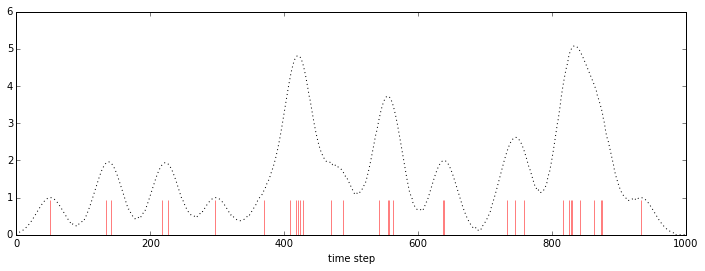

In [3]:
from scipy import signal
figure(figsize=(12,4))
plot(np.convolve(spikes,signal.gaussian(100, std=20), mode='same'),':k')
plot(spike_times,np.zeros(len(spike_times)),'|r',ms=70)
xlabel("time step")

### Exercise 1 b)

This excercise is about creating a random spike train. Concretely, you will sample one realisation of a [Bernoulli process](http://en.wikipedia.org/wiki/Bernoulli_process).

You are given a firing probability and an array of 1000 random numbers, taken from a uniform distribution between zero and one. We need a binary array called `spikes` with length 1000, which, at each step, is 1 with the given probability and 0 otherwise.

After you found out how to do this in principle, here are some relevant Python tips:

**Hint 1:** One approach involves python's `enumerate` construct. [Read about it here](https://docs.python.org/2/library/functions.html#enumerate). It exists to iterate over values from a list while *also* keeping track of an increasing index variable.

** Hint 2:** If you apply a logical operation to a given numpy array, the result is a boolean (logical) array of the same length. This leads to a one-line solution.


In [4]:
trial_length = 1000
random_numbers = np.random.rand(trial_length)
p_firing = 0.03


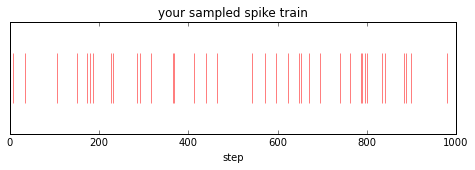

In [5]:
# spikes = ...

spikes = np.zeros(trial_length)                     # solution
for i,random_number in enumerate(random_numbers):   # solution
    if random_number < p_firing:                    # solution
        spikes[i] = 1.0                             # solution
        
# shorter alternative:                              # solution
spikes = 1.0 * (random_numbers  < p_firing)         # solution

figure(figsize=(8,2))
plot(spikes,'|r',ms=50)
title("your sampled spike train")
ylim([0.5,1.5])
yticks([])
xlabel("step")

### Exercise 1 c)
Print the total number of spikes and the mean firing rate of that spike train.

In [6]:
print "Number of spikes:", np.sum(spikes)     # solution
print "Sampled firing rate:", np.mean(spikes) # solution

#or:                                          # solution
print "Number of spikes:", spikes.sum()       # solution
print "Sampled firing rate:", spikes.mean()   # solution

Number of spikes: 37.0
Sampled firing rate: 0.037
Number of spikes: 37.0
Sampled firing rate: 0.037


### Exercise 1 d)

Above, you took a single sample of a Bernoulli process. Now, let's take repeated trials, i.e. several independent samples.

* turn `spikes` into a two-dimensional matrix with as many rows as there are repeated trials, and as many columns as there are time steps. Each row should be one realisation of a Bernoulli process with the given firing probability, i.e. one spike train as above.


* Each spike train has an average firing rate. Plot a histogram of these firing rates across trials.

* Compute the mean firing rate over all trials and show it superimposed on the histogram.

**Hint 1:** as mentioned, `for` loops always iterate over lists. To get a "traditional" `for` loop with just a counting variable, you can use the function `range` to create a list of increasing indices.

**Hint 2:** `np.mean()` and `np.sum()` accept a parameter to specify over which dimension to accumulate. The default behaviour is to accumulate accross all dimensions, resulting in a single scalar value.

**Hint 3:** `random.rand()` allows to create arrays with more than one dimension. You can create the whole matrix of spike trains without using a `for` loop. 


**Plotting hints:**

[Here is a tutorial about plotting](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) with many example pictures. Here is [the official documentation of the plotting library](http://matplotlib.org/api/pyplot_api.html). But remember that you can access documentation right from within the ipython notebook, too -- for example, you can just type `hist(*shift-TAB* *shift-TAB* *shift-TAB*...` or you can execute the line `hist?`


Mean spike rate across trials:  0.03118


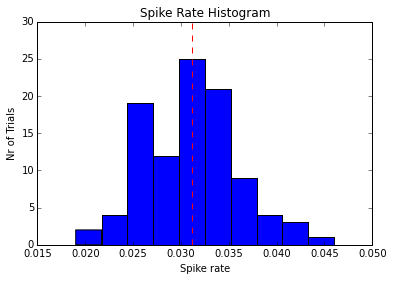

In [7]:
trial_length = 1000
trials = 100
p_firing = 0.03

spikes = np.zeros((trials,trial_length))             # solution
for trial_nr in range(trials):                       # solution
    random_numbers = np.random.rand(trial_length)    # solution
    spikes[trial_nr,random_numbers < p_firing] = 1.0 # solution

# shorter alternative:                                     # solution
spikes = np.random.rand(trials,trial_length) < p_firing    # solution

figure()                                                                # solution
hist(np.mean(spikes,1))                                                 # solution
title('Spike Rate Histogram')                                           # solution
xlabel('Spike rate')                                                    # solution
ylabel('Nr of Trials')                                                  # solution
plot([np.mean(spikes),np.mean(spikes)],[0,30],'--r')    # solution
print "Mean spike rate across trials: ",np.mean(spikes) # solution


assert spikes.shape == (trials,trial_length)

### Exercise 1 e)

You probably noticed that most realisations of our random process (i.e. most of the collected spike trains) have a spiking frequency that is different from the value that we defined as the spiking probability.

We now try to find out how likely it is that these spike trains were generated from a process with a different firing probability. To do this, we iterate over many different firing probabilities (in some interval), and for each compute the likelihood that the corresponding Bernoulli process generated our spike trains.

* create a list called `p_range` that holds possible values for p between `0.001` and `0.1`, with steps of size `0.001` between them.
* implement the function `loglike` that returns the likelihood of some value of p, given a spike train.

**Hint 1:** To compute the likelihood of a Bernoulli process with parameter p on a given spiketrain, remember that a spike train consists of many independent Bernoulli variables (one at each time bin). Also, the log-likelihood function of a single [Bernoulli distributed](http://en.wikipedia.org/wiki/Bernoulli_distribution) variable is given by: $$ l(p;x)=x \cdot \text{log} (p) + (1−x) \text{log} (1−p) $$
where $x$ is the binary outcome, $p$ the success probability.



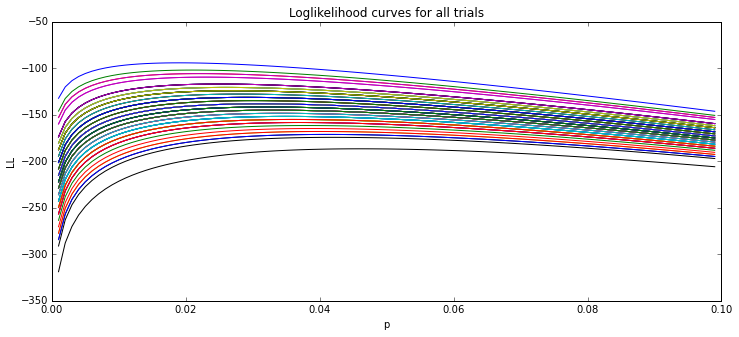

In [8]:
# create a list of possible values for p:
# p_range = np.arange(...
p_range = np.arange(0.001,0.1,0.001)   # solution

def loglike(p,xs):
    """ given a firing probability p and a spike train xs, this function
    should return the likelihood that the spike train was generated
    by a Bernoulli process with the given parameter p.
    
    Arguments:
        xs: 1D binary array of length trial_length
        p: scalar
    
    """
    # your code here
    return sum(xs*np.log(p) + (1-xs) * np.log(1-p))     # solution

# Read this to see how the function you're writing will be used:
figure(figsize=(12,5))
for t in range(trials):
    loglikes = np.zeros(len(p_range))
    for i,p in enumerate(p_range):
        loglikes[i] = loglike(p,spikes[t,:]) # <--- the likelihood calculation!
    plot(p_range,loglikes)
    
title('Loglikelihood curves for all trials')
xlabel('p')
ylabel('LL')

### Exercise 1 f)

Let's analyze these curves.

* In each trial, search for the value $\hat{p}$ with the highest likelihood, i.e. the maximum likelihood estimate of p.
* Create a histogram of these estimated values of p across all trials. Print their mean.

**Hint 1:** Look into `np.argmax`, which gives you the *index* at which an array is maximal.

**Hint 2:** There are many ways solve this, but perhaps you find it helpful to create a growing list. To add values to a list, initialise an empty list like so: `mylist = []`. Then, for example in a for loop, you can append a value to the list like this: `mylist.append(value)`. 
[List comprehensions](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) are a more concise notation for this.


**Question:** What is the the relationship between the the true firing probability and the mean maximum likelihood estimator of p that you just printed? What would you need to do to make the two more similar?

Mean estimated firing probability: 0.03118


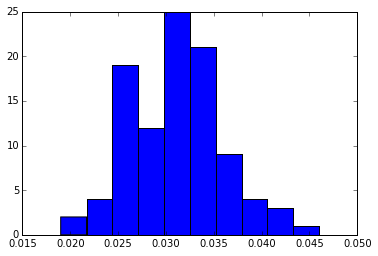

In [9]:
figure()
maxima = []                                         # solution
for t in range(trials):                             # solution
    this_curve = []                                 # solution
    for p in p_range:                               # solution
        this_curve.append(loglike(p,spikes[t,:]))   # solution
    maxima.append(p_range[np.argmax(this_curve)])   # solution
hist(maxima)                                        # solution

print "Mean estimated firing probability:", np.mean(maxima)   # solution

Exercise 2
-------------

Until now, we assumed the same firing probability in each time step. Now, let's look at spike trains where the firing probability changes over time.

First, we generate some spike trains whose firing probability varies. To this end, we define a function that provides a spike probability for each time step (consisting of two sine waves with different frequencies, summed together with weights $\alpha$ and $\beta$).

Your task will be to take these spike trains and estimate the combination of parameters $\hat{\alpha}$ and $\hat{\beta}$ that are most likely to explain the given spike trains, and compare these estimates with the true values of $\alpha$ and $\beta$.

First, run the next two cells to generate the spikes.

true values: 0.07 0.05


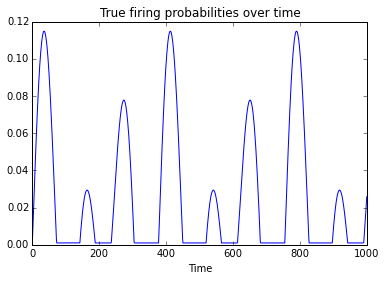

In [10]:
original_alpha = 0.07
original_beta = 0.05

print "true values:",original_alpha, original_beta

def p_t(alpha,beta):
    """returns some wavy curve between 0 and 1"""
    wave = alpha * np.sin(np.arange(trial_length)/20.0) + beta * np.sin(np.arange(trial_length)/30.0)
    wave[wave>0.999] = 0.999
    wave[wave<0.001] = 0.001
    return wave

plot(p_t(original_alpha,original_beta))  
title('True firing probabilities over time')
xlabel('Time')

true alpha: 0.07 true beta: 0.05


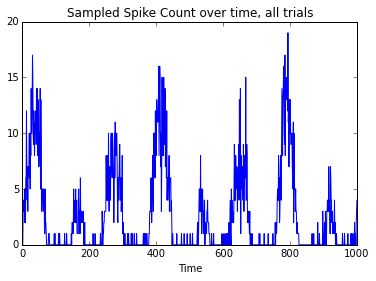

In [11]:
trial_length = 1000
trials = 100

spikes = np.zeros((trials,trial_length))
for trial in range(trials):
    random_numbers = np.random.rand(trial_length)
    spikes[trial,random_numbers  < p_t(original_alpha,original_beta)] = 1.0

figure()
plot(sum(spikes,0))
xlabel('Time')
title('Sampled Spike Count over time, all trials')
print "true alpha:", original_alpha, "true beta:",original_beta

## Exercise 2 a)

How much information about the changing firing probability can we recover from a single spike train? To find out, we want to estimate the parameters $\alpha$ and $\beta$ individually for each spike train.

To do this, we will again search over a range of possible parameters and compute the likelihoods for each. 
 
 * Define some plausible intervals over which to search for $\alpha$ and $\beta$.
  
All possible progressions of the firing probability over time are then plotted below.

**Hint:** If the cell takes too long to execute, interrupt the kernel and choose a smaller search space (smaller ranges or wider steps).

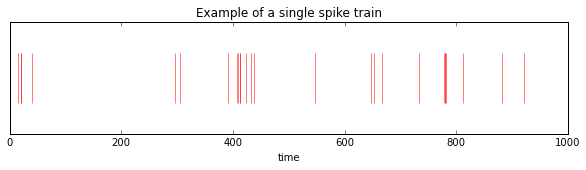

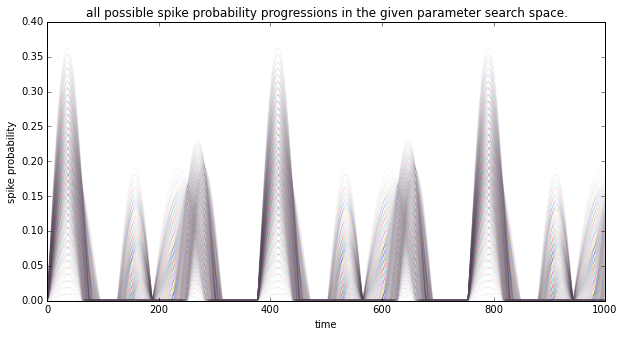

In [12]:
figure(figsize=(10,2))
title("Example of a single spike train")
plot(spikes[0,:],'|r',ms=50)
ylim([0.5,1.5])
yticks([])
xlabel("time")


# Use these two arrays to define your search space. 
# One should contain all values for alpha we want
# to try, the other all values for beta.
# alpha_range = ...
# beta_range = ...

alpha_range = np.arange(0,0.2,0.01)             # solution
beta_range = np.arange(0,0.2,0.01)              # solution

assert len(alpha_range) * len(beta_range) <= 10000

figure(figsize=(10,5))
for b in beta_range:
    for a in alpha_range:
        plot(p_t(a,b),alpha=1.0/np.sqrt(len(alpha_range) * len(beta_range)))

title('all possible spike probability progressions in the given parameter search space.')
xlabel('time')
ylabel('spike probability')

Some of these possible evolutions of firing probabilities can explain a given spike train better than others, and now we want to find which ones those are.

* Implement the function `ll(ps,xs)` which computes the log-likelihood of a spike train `xs`, under the assumption that the spike train was generated by a Bernoulli process with the vector `ps` of firing probabilities per time step. 

**Hint:** This works similarly to the case above where we had the same, fixed firing probability in all time steps. Think of each time bin as an independent, bernoulli distributed random variable with some particular spiking probability.

true alpha: 0.07 true beta: 0.05


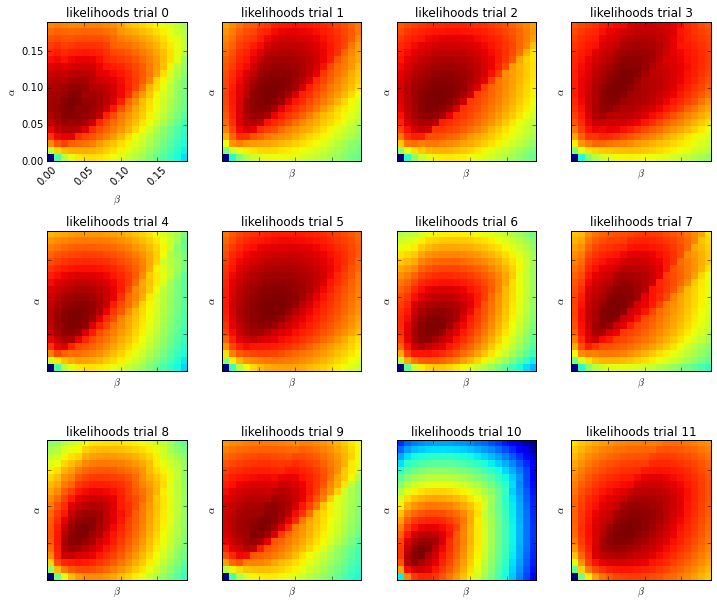

In [13]:
def ll(ps,xs):
    """returns the log likelihood of a spike train xs
    given a sequence of firing probabilities ps.
    
    Arguments:
        ps: 1D float array of length trial_length
        xs: 1D binary array of length trial_length
"""
    # your code here
    return sum(xs*np.log(ps) +(1 - xs) * np.log(1-ps))     # solution

# Read this to see how the function you're writing will be used:
figure(figsize=(12,10))
plot_trials = range(12)
firstplot = True
for trial_nr in plot_trials:
    likelihoods = np.zeros((len(alpha_range),len(beta_range)))
    for ia,a in enumerate(alpha_range):
        for ib,b in enumerate(beta_range):
            likelihoods[ia,ib] = ll(p_t(a,b),spikes[trial_nr,:]) # <--- the likelihood calculation!
    
    # The rest is just plot code:
    ax = subplot(3,len(plot_trials)/3,trial_nr+1)
    title('likelihoods trial '+str(trial_nr))
    im = imshow(likelihoods,interpolation='nearest',origin='lower')
    im.set_extent([beta_range[0],beta_range[-1],alpha_range[0],alpha_range[-1]])
    xticks(rotation=45)
    xlabel(r'$\beta $')
    ylabel(r'$\alpha $')
    if not firstplot:
        setp(ax.get_xticklabels(), visible=False)
        setp(ax.get_yticklabels(), visible=False)
    firstplot = False
    subplots_adjust(hspace=0.5)
print "true alpha:", original_alpha, "true beta:",original_beta

You can see that you already get some idea about plausible values for $\alpha$ and $\beta$ even from looking at a single spike train. Let's refine this estimate by looking at multiple trials: Compute the liklihoods of different $\alpha$ and $\beta$ on *all* the spike trains.

* implement the function `ll_alltrials(ps,spikes)`. The only difference to the previous one is that it should return the likelihood of the vector of probabilities `ps` given **all** spike trains.

* What is the maximum likelihood estimate of $\alpha$ and $\beta$?


**Hint:** Just like the time bins witin a spike train, the different spike trains are also independent of each other.


true alpha: 0.07 true beta: 0.05


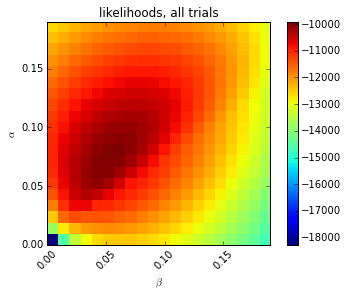

In [14]:
def ll_alltrials(ps,spikes):
    """Returns the likelihood of probability progression ps given
    all spike trains.
    
    Arguments:
        ps: 1D float array of length trial_length
        spikes: 2D binary array with dimensions nr_trials x trial_length
    """
    # your code here
    return np.sum([ll(ps,spikes[t,:]) for t in range(trials)])  # solution

# Read this to see how the function you're writing will be used:
likelihoods = np.zeros((len(alpha_range),len(beta_range)))
for ia,a in enumerate(alpha_range):
    for ib,b in enumerate(beta_range):
        likelihoods[ia,ib] = ll_alltrials(p_t(a,b),spikes) # <--- the likelihood calculation!

# Plotting:
title('likelihoods, all trials')
im = imshow(likelihoods,interpolation='nearest',origin='lower')
im.set_extent([beta_range[0],beta_range[-1],alpha_range[0],alpha_range[-1]])
xticks(rotation=45)
xlabel(r'$\beta $')
ylabel(r'$\alpha $')
colorbar()
print "true alpha:", original_alpha, "true beta:",original_beta

# That's it for part 1!